<center>

# Introduccion a Programación Cuántica – CENIDET 

## 🧠 Mediciones en Qiskit 🧠
Autor: **Oscar Alejandro López Campero**  
Maestría en Ciencias de la Computación – Línea de Ingeniería de Software  
Noviembre 2025

---

</center>


## 📚 Contenido del Módulo: Medición y Resultados en Circuitos Cuánticos

En este módulo el estudiante aprenderá a interpretar los resultados de un circuito cuántico mediante **la medición de qubits**, comprendiendo cómo el estado cuántico colapsa a un valor clásico y cómo esto afecta la probabilidad de los resultados.

Se explorarán las herramientas que ofrece Qiskit para simular mediciones, visualizar los resultados mediante histogramas y ejecutar experimentos repetidos (**shots**) para obtener distribuciones estadísticas.

Este conocimiento es esencial para dar el siguiente paso hacia el diseño de algoritmos cuánticos reales, ya que **todo programa cuántico termina en una medición**.

---

## 🧾 Temario

1️⃣ **Fundamentos de la medición cuántica**  
2️⃣ **Cómo agregar mediciones en Qiskit**  
3️⃣ **Ejemplo: medición de un qubit en estado base**  
4️⃣ **Medición de un qubit en superposición**  
5️⃣ **Visualización de resultados con histogramas**  
6️⃣ **Medición en sistemas de múltiples qubits**  
7️⃣ **Interpretación estadística y colapso del estado**  
8️⃣ **Ejercicios y experimentación**

---


---

## ⚙️ Sección 1 – Fundamentos de la medición cuántica

En computación cuántica, **medir un qubit** significa observar su estado y obtener como resultado un valor clásico:  
- `0` si el qubit colapsa al estado `|0⟩`  
- `1` si colapsa al estado `|1⟩`

> ⚠️ La medición **colapsa** el estado cuántico: una vez que se mide, el qubit ya no está en superposición.

Antes de la medición, un qubit puede estar en un estado como:
$$
|ψ⟩ = α|0⟩ + β|1⟩
$$


Donde:
- `|α|²` es la **probabilidad** de medir un `0`  
- `|β|²` es la **probabilidad** de medir un `1`

El resultado que obtienes al medir un qubit **es aleatorio**, pero obedece a esas probabilidades.  
Por eso en Qiskit ejecutamos los circuitos muchas veces (llamados **shots**) para obtener una distribución confiable.

---



## 🧪 Sección 2 – Cómo agregar mediciones en Qiskit

En los circuitos cuánticos, las mediciones son el puente entre el mundo cuántico y el clásico.

Medir un qubit significa colapsar su estado cuántico a uno de los dos posibles resultados clásicos: 0 o 1.


Qiskit permite agregar mediciones explícitamente usando el método `.measure()`.

Este método conecta un qubit con un bit clásico, y guarda el resultado de la medición en ese bit clásico.


En esta sección aprenderemos cómo:

- Agregar una medición a un circuito cuántico
- Visualizar el circuito con la operación de medición
- Ejecutar el circuito en un simulador y obtener resultados
- Interpretar los resultados de la medición


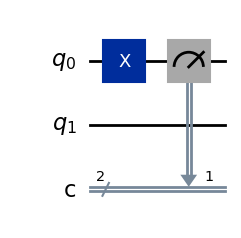

In [2]:
from qiskit import QuantumCircuit

# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc = QuantumCircuit(2, 2)

# Aplicar compuerta X para poner el qubit en estado |1⟩
qc.x(0)

# Medir el qubit 0 y guardar el resultado en el bit clásico 0
qc.measure(0, 1)

# Mostrar el circuito
qc.draw('mpl')


### 🔍 ¿Qué vemos en el diagrama del circuito?

El circuito mostrado contiene **1 qubit** (`q0`) y **1 bit clásico** (`c0`). Visualmente se representa como dos líneas horizontales:  
- La **línea superior** corresponde al **qubit q0**  
- La **línea inferior** corresponde al **bit clásico c0**

Los elementos que aparecen en el diagrama son:

- `x`: Compuerta X (NOT cuántico) aplicada al qubit `q0`. Cambia su estado de `|0⟩` a `|1⟩`.
- `measure`: Símbolo de medición que indica que se realiza una medición sobre el qubit `q0`.
- **Conexión hacia `c0`**: La medición del qubit se guarda en el bit clásico `c0`, mostrando la transición del mundo cuántico al mundo clásico.

🔁 En este caso, como aplicamos la compuerta `X` antes de medir, el estado cuántico final del qubit es `|1⟩`.  
Por lo tanto, **el resultado clásico medido será siempre `1`**.


---
### ▶️ Ejecutar el circuito y visualizar resultados

Una vez que tenemos un circuito con medición, es momento de **simularlo** y observar qué resultado obtenemos al medir el qubit.

En este ejemplo, usaremos el simulador `BasicSimulator` de Qiskit, que permite ejecutar el circuito de forma simple sin dependencias externas. Ejecutaremos el circuito **1024 veces** y contaremos cuántas veces se obtiene cada posible resultado (0 o 1).

Usamos las siguientes funciones de Qiskit:

- `BasicSimulator()`: crea un simulador clásico que ejecuta circuitos cuánticos y produce resultados probabilísticos.
- `simulator.run(circuito, shots=1024)`: ejecuta el circuito 1024 veces para recolectar estadísticas sobre las mediciones.
- `result.get_counts()`: obtiene un diccionario con los resultados de la medición, donde las claves son los estados medidos (como "0" o "1") y los valores indican cuántas veces se midió cada uno.
- `plot_histogram(counts)`: genera un histograma que muestra visualmente la frecuencia con la que aparece cada estado medido.

Este tipo de simulación nos ayuda a **comprender la naturaleza probabilística** de los sistemas cuánticos una vez que se realiza una medición.


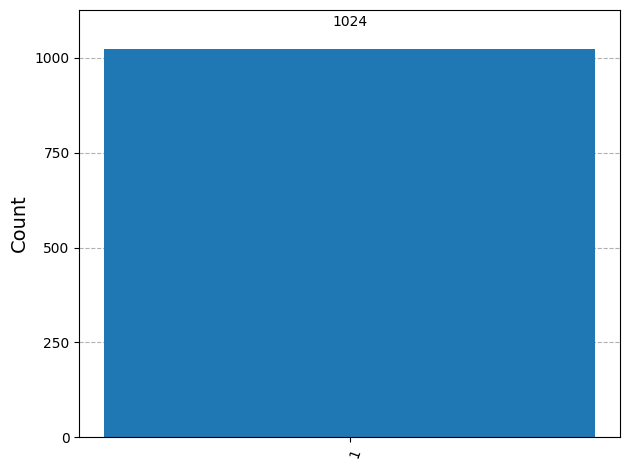

In [5]:
# Importar componentes actualizados
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Crear circuito con una compuerta Hadamard y medición
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

# Usar BasicSimulator (proveedor básico moderno)
simulator = BasicSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Mostrar resultados
plot_histogram(counts)


## 📌 Ejemplo: Compuerta Hadamard y Medición

En este ejemplo aplicaremos una **compuerta Hadamard** al qubit para colocarlo en **superposición**, y luego realizaremos una **medición** para observar los resultados posibles.

La compuerta Hadamard transforma el estado |0⟩ en una superposición entre |0⟩ y |1⟩.  
Al medir este estado, se colapsa a uno de los dos resultados con una **probabilidad del 50%** cada uno (idealmente).

Este experimento nos permite observar **el comportamiento probabilístico de un sistema cuántico** al aplicar una compuerta antes de medir.


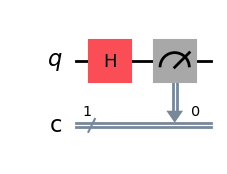

In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Crear circuito con 1 qubit y 1 bit clásico
qc = QuantumCircuit(1, 1)

# Aplicar compuerta Hadamard al qubit
qc.h(0)

# Medir el qubit 0
qc.measure(0, 0)

# Mostrar diagrama del circuito
qc.draw('mpl')


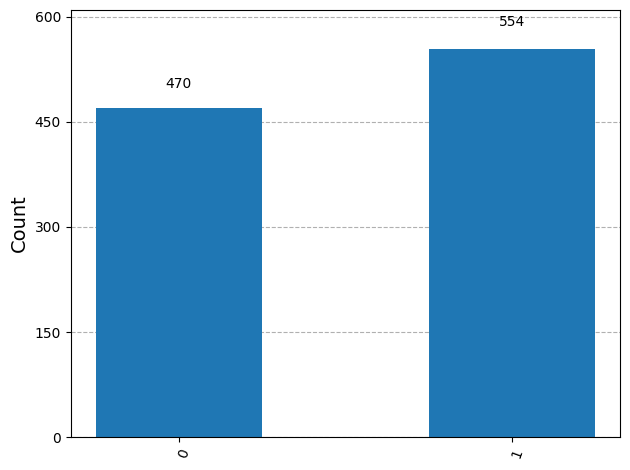

In [8]:
# Importar componentes actualizados
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Crear circuito con una compuerta Hadamard y medición
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Usar BasicSimulator (proveedor básico moderno)
simulator = BasicSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Mostrar resultados
plot_histogram(counts)

# 🔍 Sección 3.3 – Comparación: pocos vs muchos shots en la medición

En esta sección exploraremos cómo el **número de repeticiones (shots)** en una simulación cuántica **afecta los resultados de la medición**.  
Usaremos un circuito sencillo que pone al qubit en superposición con una compuerta **Hadamard** y lo mediremos con diferentes cantidades de ejecuciones.

Este análisis es clave para comprender el **comportamiento probabilístico** de los sistemas cuánticos y cómo se estabilizan los resultados con más repeticiones.


### ⚙️ Circuito cuántico base

El siguiente circuito aplica una compuerta **Hadamard** al qubit 0, lo cual genera una superposición equitativa entre los estados |0⟩ y |1⟩.  
Luego, se mide ese qubit y se guarda el resultado en un bit clásico.

Este circuito será la base para las simulaciones con diferentes cantidades de shots.


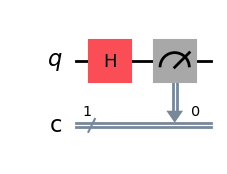

In [9]:
# Crear el circuito base
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')


### 📉 Simulación con pocos shots (10)

En esta simulación ejecutamos el circuito únicamente **10 veces**, lo cual puede generar **resultados aleatorios** no representativos de las verdaderas probabilidades cuánticas.

Esto nos ayuda a visualizar cómo el número de ejecuciones afecta la estabilidad de los resultados.


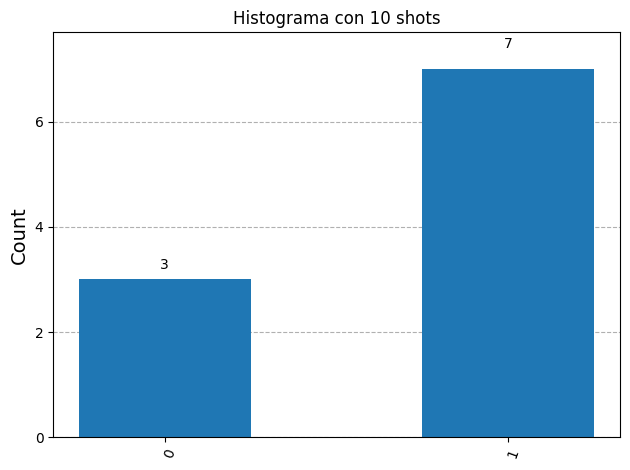

In [11]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Simulación con pocos shots
simulator = BasicSimulator()
job_10 = simulator.run(qc, shots=10)
result_10 = job_10.result()
counts_10 = result_10.get_counts()

plot_histogram(counts_10, title="Histograma con 10 shots")


### 📈 Simulación con muchos shots (5000)

En esta simulación ejecutamos el mismo circuito, pero ahora **5000 veces**.  
Con esta cantidad de ejecuciones, se espera que los resultados se **acercan a las probabilidades teóricas esperadas**.

Como la compuerta Hadamard sobre el estado |0⟩ genera una distribución 50%-50%, el histograma debería mostrar ambos valores con frecuencias similares.


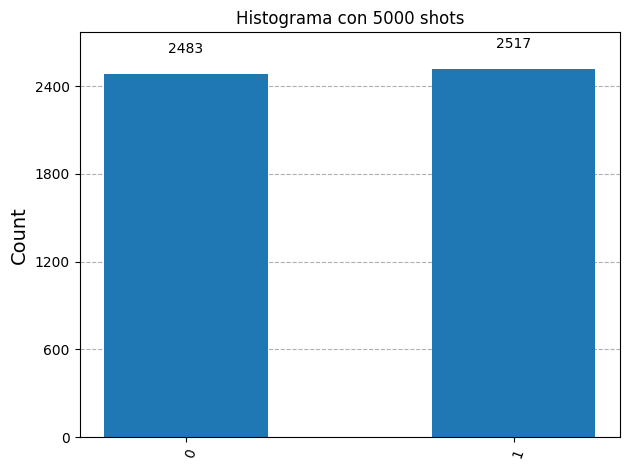

In [13]:
# Simulación con muchos shots
job_5000 = simulator.run(qc, shots=5000)
result_5000 = job_5000.result()
counts_5000 = result_5000.get_counts()

plot_histogram(counts_5000, title="Histograma con 5000 shots")


### 🧠 Análisis de resultados

- Con **solo 10 shots**, el histograma puede variar mucho debido a la **naturaleza probabilística y aleatoria** de la medición cuántica.  
  Por ejemplo, podríamos obtener 7 veces "1" y solo 3 veces "0", lo cual **no representa la verdadera distribución** esperada.  
  Esto se debe a que con tan pocas muestras, el **error estadístico es muy alto** y el azar domina el resultado.

- Con **5000 shots**, el circuito se ejecuta suficientes veces como para que las **probabilidades reales emerjan**.  
  La compuerta Hadamard sobre el estado |0⟩ genera una superposición equitativa entre |0⟩ y |1⟩, es decir, **50% de probabilidad para cada uno**.  
  Al repetir la medición miles de veces, el sistema revela su naturaleza probabilística y los resultados convergen hacia ese equilibrio esperado.



## 📚 Referencias

1. M. A. Nielsen y I. L. Chuang, *Quantum Computation and Quantum Information*, 10th Anniversary Edition, Cambridge University Press, 2010.

2. IBM Quantum. [Qiskit Documentation](https://docs.qiskit.org) — Documentación oficial de Qiskit. Consultado en agosto de 2025.

3. IBM Quantum. [Qiskit Textbook – Chapter 1.3: Quantum Measurement](https://qiskit.org/textbook/ch-states/quantum-measurements.html) — Explicación detallada sobre cómo funcionan las mediciones en sistemas cuánticos.

4. Qiskit Contributors. [Learn Quantum Computation using Qiskit](https://qiskit.org/textbook) — Texto oficial y gratuito para aprender computación cuántica con Qiskit.

5. T. Hidary, *Quantum Computing: An Applied Approach*, 2nd ed., Springer, 2021.

6. R. S. S. Kaur y J. Venegas-Gómez, “Quantum Computing: A Primer for the Software Developer,” *arXiv preprint*, arXiv:2011.12907, 2020. https://arxiv.org/abs/2011.12907

7. A. Singh, P. Upadhyaya, S. Sharma, et al., “A Survey on Available Tools and Technologies Enabling Quantum Computing,” *ACM Computing Surveys*, vol. 55, no. 1, pp. 1–38, 2023.

8. P. Aiello, M. Felderer, R. Pérez-Castillo, “Quantum Software Engineering: State-of-the-Art, Challenges, and Future Research Agenda,” *Information and Software Technology*, vol. 150, 2022.

9. J. D. Weisz, M. Ashoori, Z. Ashktorab, “Entanglion: A Board Game for Teaching the Principles of Quantum Computing,” *CHI EA '21*, ACM, 2021.

10. Qiskit Community Tutorials. [Measurements and Classical Bits in Qiskit](https://qiskit.org/documentation/tutorials/circuits/03_measuring_qubits.html) — Tutorial paso a paso sobre cómo implementar y entender mediciones en Qiskit.

11. Quantum Country. [Spaced Repetition Guide to Quantum Measurement](https://quantum.country/qcvc) — Una guía interactiva para aprender los fundamentos de la medición en mecánica cuántica.


In [4]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Crear un circuito
qc = QuantumCircuit(1)
qc.h(0)  # aplicar Hadamard -> superposición

# Obtener el estado
state = Statevector.from_instruction(qc)

# Visualizar en formato city
plot_state_city(state, title="Visualización City")
plt.show()


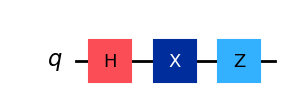

🧪 Vector de estado:


NameError: name 'array_to_latex' is not defined

In [5]:
import qiskit.quantum_info as qi
# Caso 2: aplicar X luego Hadamard al qubit 0
qc = QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.z(0)
psi = Statevector(qc)



# Mostrar circuito
display(qc.draw('mpl'))

# Mostrar vector de estado
print("🧪 Vector de estado:")
display(array_to_latex(psi.data))

# Mostrar notación ket
print("🧪 Estado en notación ket:")
display(psi.draw('latex'))

# Mostrar QSphere
print("🧿 QSphere del estado:")
plot_state_qsphere(psi)

Density_matrix = qi.DensityMatrix.from_instruction (qc)
display(array_to_latex(Density_matrix.data))